In [1]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# Loading Data

In [2]:
url = "https://drive.google.com/uc?id=1skCuguLrezGBRZqBPxRtwk5EGKql87_S"

output = "TV_data.csv"

if not os.path.exists('TV_data.csv'):
  gdown.download(url, output, quiet=False)

df = pd.read_csv(output, encoding='latin1')

In [3]:
df

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,27/05/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,21/05/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,10/08/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,26/07/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,07/07/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1247848,22/04/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial
1048571,1247849,29/11/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends
1048572,1247850,15/06/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror
1048573,1247851,11/09/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear


# Explore the Data


In [4]:
df.shape

(1048575, 13)

In [5]:
df.drop(['Column1', 'program_name', 'program_desc', 'series_title', 'date_'], axis=1, inplace=True)

df.rename(columns={'program_class': 'type', 'program_genre': 'genre', 'original_name': 'name', 'user_id_maped': 'user_id'}, inplace=True)


In [6]:
df.head().T

,0,1,2,3,4
user_id,26138,7946,7418,19307,15860
duration_seconds,40,17,8,76,87
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
season,0,0,0,0,0
episode,0,0,0,0,0
genre,Drama,Animation,Animation,Animation,Biography
hd,0,1,1,1,1
name,100 treets,Moana,The Mermaid Princess,The Mermaid Princess,Churchill


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   user_id           1048575 non-null  int64 
 1   duration_seconds  1048575 non-null  int64 
 2   type              1048575 non-null  object
 3   season            1048575 non-null  int64 
 4   episode           1048575 non-null  int64 
 5   genre             1048575 non-null  object
 6   hd                1048575 non-null  int64 
 7   name              1048575 non-null  object
dtypes: int64(5), object(3)
memory usage: 64.0+ MB


In [8]:
df.describe()

,user_id,duration_seconds,season,episode,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.709266e+04,1.230957e+03,1.342139e+00,6.157952e+00,3.862728e-01
std,1.003513e+04,6.821058e+03,2.104095e+00,1.222015e+01,4.868946e-01
min,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.253000e+03,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.714900e+04,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.566500e+04,1.328000e+03,1.000000e+00,9.000000e+00,1.000000e+00
max,3.428000e+04,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00


In [9]:
df.genre.value_counts()

Animation                           401730
Action                              174155
Drama                               155048
Comedy                              136577
Horror                               75306
Thriller                             39601
Family                               26668
Biography                            16135
Documentary                          13291
NOT_DEFINED_IN_UMS                    4535
Crime                                 3232
Sci-Fi                                1322
Romance                                512
Adventure                              239
SERIES_NOT_ADDED_UNDER_ANY_GENRE       216
Wrestling                                8
Name: genre, dtype: int64

In [10]:
df.hd.value_counts()

0    643539
1    405036
Name: hd, dtype: int64

# Clean the Data

In [11]:
df.isnull().sum()

user_id             0
duration_seconds    0
type                0
season              0
episode             0
genre               0
hd                  0
name                0
dtype: int64

In [12]:

# قم بإضافة عمود جديد "cleaned_name" يحتوي على أسماء الأفلام بدون أية فراغات وبحروف صغيرة
df['cleaned_name'] = df['name'].apply(lambda x: x.strip().lower())

print(len(df.cleaned_name.unique())) # عدد الأسماء الموحدة بدون تكرار
print(len(df.name.unique())) # عدد الأسماء الأصلية بدون تكرار

# قم بفرز الداتا فريم وفقًا للعمود "cleaned_name"
df.sort_values(by='cleaned_name', inplace=True)

# عرض الداتا فريم بعد التعديلات
df

1753
1795


,user_id,duration_seconds,type,season,episode,genre,hd,name,cleaned_name
13540,2015,64,MOVIE,0,0,Thriller,1,#FollowFriday,#followfriday
635802,4642,63,MOVIE,0,0,Thriller,0,#FollowFriday,#followfriday
219073,22668,64,MOVIE,0,0,Thriller,1,#FollowFriday,#followfriday
218457,12171,15,MOVIE,0,0,Thriller,0,#FollowFriday,#followfriday
445521,2743,4,MOVIE,0,0,Thriller,1,#FollowFriday,#followfriday
...,...,...,...,...,...,...,...,...,...
802904,1180,28,MOVIE,0,0,Comedy,0,Zoolander,zoolander
496196,29381,49,MOVIE,0,0,Comedy,0,Zoolander,zoolander
428914,3237,16,MOVIE,0,0,Comedy,0,Zoolander,zoolander
574107,32742,28,MOVIE,0,0,Comedy,0,Zoolander,zoolander


In [13]:
df.type.value_counts()

SERIES/EPISODES    560174
MOVIE              488401
Name: type, dtype: int64

In [14]:
df['type'] = df['type'].replace('SERIES/EPISODES', 'series')
df['type'] = df['type'].replace('MOVIE', 'movie')

In [15]:
# display Genre classes

df = df.drop(df[df['genre'] == 'SERIES_NOT_ADDED_UNDER_ANY_GENRE'].index)
df = df.drop(df[df['genre'] == 'NOT_DEFINED_IN_UMS'].index)

df.genre.unique()

array(['Thriller', 'Drama', 'Family', 'Comedy', 'Action', 'Biography',
       'Horror', 'Animation', 'Documentary', 'Crime', 'Sci-Fi',
       'Adventure', 'Romance', 'Wrestling'], dtype=object)

In [217]:
# no_episode = df[(df['type'] == 'series') & (df['episode'] == 0)]

no_episode = df[(df['type'] == 'series') & (df['episode'] == 0)]

len(no_episode.name.unique())

no_episode

,user_id,duration_seconds,type,season,episode,genre,hd,name,cleaned_name
58511,1664,9,series,1,0,Comedy,1,2 Fil-Isaaf (T),2 fil-isaaf (t)
197346,25917,34,series,1,0,Comedy,1,2 Fil-Isaaf (T),2 fil-isaaf (t)
830270,33741,13,series,1,0,Comedy,1,2 Fil-Isaaf (T),2 fil-isaaf (t)
935850,9340,13,series,1,0,Comedy,1,2 Fil-Isaaf (T),2 fil-isaaf (t)
490858,22565,59,series,1,0,Comedy,1,2 Fil-Isaaf (T),2 fil-isaaf (t)
...,...,...,...,...,...,...,...,...,...
531944,194,52,series,3,0,Action,1,Zoo,zoo
641951,22361,21,series,3,0,Action,1,Zoo,zoo
947647,9160,9,series,2,0,Action,1,Zoo,zoo
304183,23162,28,series,2,0,Action,1,Zoo,zoo


In [222]:
# TO DELETE
d = df.drop_duplicates(subset=['cleaned_name'])

no_episode = d[(d['type'] == 'series') & (d['episode'] == 0)]

# len(no_episode.name.unique())

print(no_episode.shape)




(22, 9)


# Unique Moveis & Series
Feature Engnreeing

In [17]:
# unique movies and series
programs = df.drop_duplicates(subset=['cleaned_name'])

programs.shape

(1751, 9)

In [99]:
programs

,type,genre,hd,name,cleaned_name,number_of_watches
13540,movie,Thriller,1,#FollowFriday,#followfriday,510
952639,movie,Thriller,0,10 Days in a Madhouse,10 days in a madhouse,553
755126,movie,Drama,1,100 treets,100 treets,1851
328957,movie,Family,0,101 Dalmatians,101 dalmatians,118
175848,movie,Comedy,0,102 Dalmatians,102 dalmatians,172
...,...,...,...,...,...,...
342681,movie,Drama,1,Zero Dark Thirty,zero dark thirty,242
268255,movie,Drama,0,Zodiac,zodiac,118
1045374,movie,Comedy,0,Zombieland,zombieland,923
282712,series,Action,0,Zoo,zoo,3739


In [18]:
# remove unnessary attribute
programs.drop(['user_id', 'duration_seconds', 'season', 'episode'], axis=1, inplace = True)

programs

<ipython-input-18-8c9efd0435b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  programs.drop(['user_id', 'duration_seconds', 'season', 'episode'], axis=1, inplace = True)


,type,genre,hd,name,cleaned_name
13540,movie,Thriller,1,#FollowFriday,#followfriday
952639,movie,Thriller,0,10 Days in a Madhouse,10 days in a madhouse
755126,movie,Drama,1,100 treets,100 treets
328957,movie,Family,0,101 Dalmatians,101 dalmatians
175848,movie,Comedy,0,102 Dalmatians,102 dalmatians
...,...,...,...,...,...
342681,movie,Drama,1,Zero Dark Thirty,zero dark thirty
268255,movie,Drama,0,Zodiac,zodiac
1045374,movie,Comedy,0,Zombieland,zombieland
282712,series,Action,0,Zoo,zoo


In [ ]:
# add number of watches
watch_counts = df.groupby('name')['user_id'].count()

programs['number_of_watches'] = programs['name'].apply(lambda x: watch_counts[x])

# Data Visulaization

Program Type

{'movie': 1491, 'series': 260}


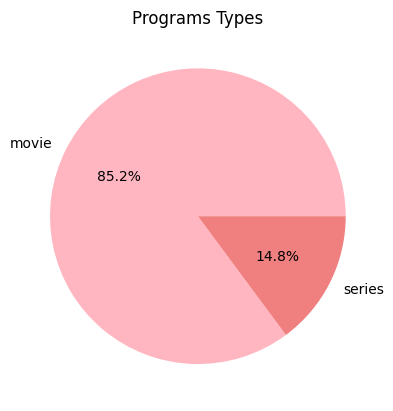

In [215]:
program_count = programs.type.value_counts().to_dict()

print(program_count)

plt.pie(program_count.values(), labels= program_count.keys(), autopct='%1.1f%%', colors=['lightpink', 'lightcoral'])

plt.title('Programs Types')
plt.savefig('program_percent.png', dpi=300, bbox_inches='tight')
plt.show()

Display Genres counts


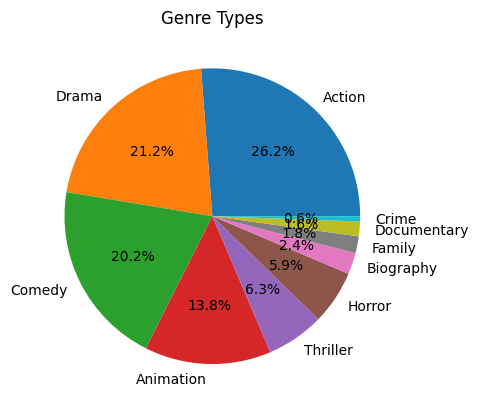

In [21]:
genre_count = programs.genre.value_counts()[:10].to_dict()

plt.pie(genre_count.values(), labels= genre_count.keys(), autopct='%1.1f%%')

plt.title('Genre Types')
plt.savefig('genre_percent.png', dpi=300, bbox_inches='tight')
plt.show()

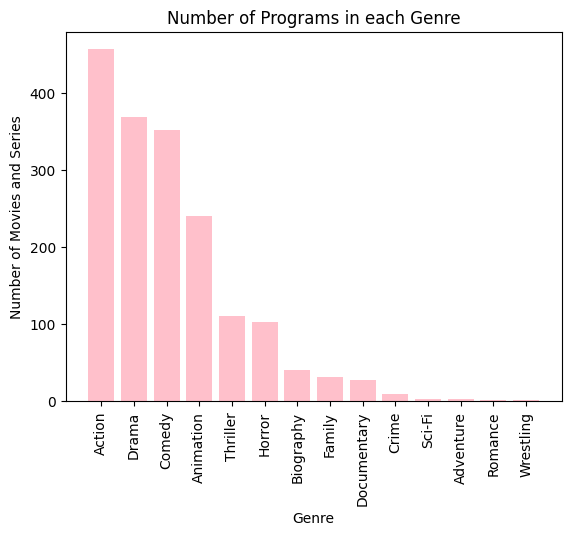

In [22]:
genre_count = programs.genre.value_counts().to_dict()

plt.bar( genre_count.keys(), genre_count.values(), color='pink')

plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Number of Movies and Series")
plt.title("Number of Programs in each Genre")
plt.savefig('genre_count.png', dpi=300, bbox_inches='tight')

plt.show()

Number of Movies and Series per Genre

([], [])

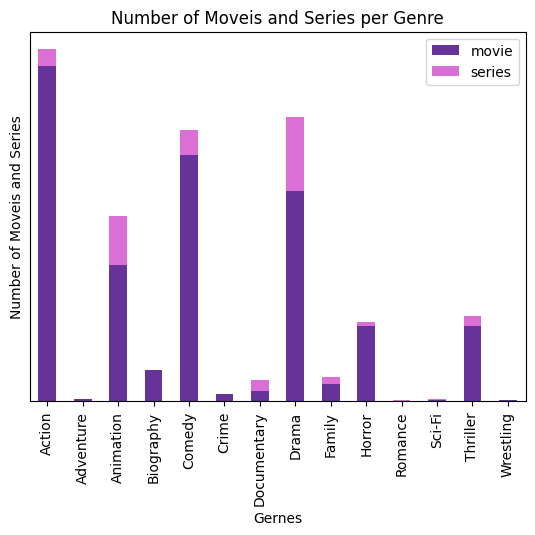

In [210]:
genres = programs.genre.unique()
genres.sort()

a = programs.groupby('type')[['genre', 'type']].value_counts().to_dict()
b = {
    'movie': [],
    'series': [],
}

for genre in genres:
  b['movie'].append(a.get(('movie', genre), 0))
  b['series'].append(a.get(('series', genre), 0))

program_per_genre = pd.DataFrame(b, index= genres)

program_per_genre.plot(kind="bar", stacked=True, color=['rebeccapurple', 'orchid'])
plt.title("Number of Moveis and Series per Genre")
plt.xlabel("Gernes")
plt.ylabel("Number of Moveis and Series")
plt.savefig('program_per_genre.png')
plt.yticks([])

Top 5 Genre Based on Number of Watches

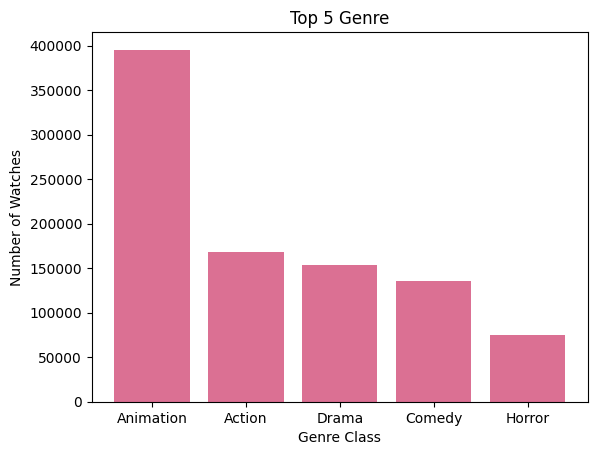

In [211]:
top_genres = programs.groupby('genre')['number_of_watches'].sum().sort_values(ascending=False)[:5].to_dict()
plt.bar( top_genres.keys(), top_genres.values(), color='palevioletred')

plt.xlabel("Genre Class")
plt.ylabel("Number of Watches")
plt.title("Top 5 Genre")

plt.savefig('top_genre.png')
plt.show()

Top 5 Movies and Series

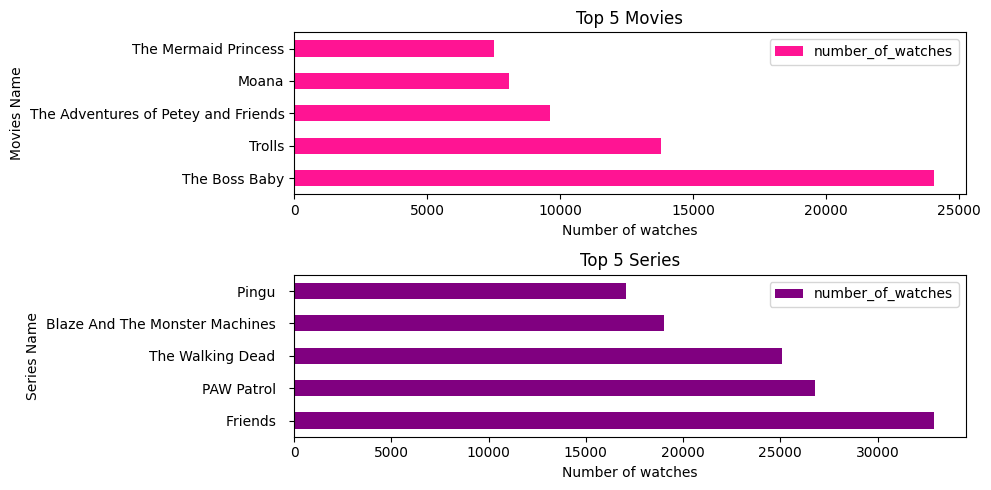

In [26]:
movies = programs[programs['type'] == 'movie']
series = programs[programs['type'] == 'series']

movies_5 = movies[['name', 'number_of_watches']].nlargest(5, columns='number_of_watches')
series_5 = series[['name', 'number_of_watches']].nlargest(5, columns='number_of_watches')

# Set the 'name' column as the index for proper labeling
movies_5.set_index('name', inplace=True)
series_5.set_index('name', inplace=True)

# Create a figure with two subplots
fig, (top_5_movies, top_5_series) = plt.subplots(2, 1, figsize=(10, 5))

# first subplot (top_5_movies)
movies_5.plot.barh(ax=top_5_movies, color='deeppink')
top_5_movies.set_xlabel('Number of watches')
top_5_movies.set_ylabel('Movies Name')
top_5_movies.set_title('Top 5 Movies')


# second subplot (top_5_series)
series_5.plot.barh(ax=top_5_series, color='purple')
top_5_series.set_xlabel('Number of watches')
top_5_series.set_ylabel('Series Name')
top_5_series.set_title('Top 5 Series')


# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('top_programs.png')
plt.show()

Program Quality

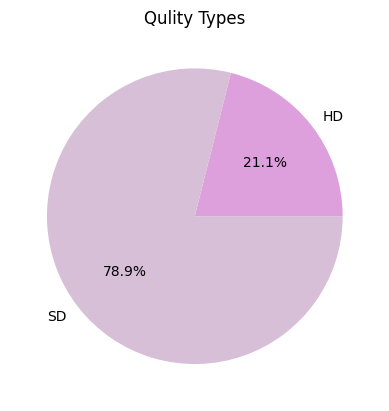

In [47]:
hd_count = programs.hd.value_counts().to_dict()
hd_count = {'HD': hd_count[1], 'SD': hd_count[0]}

plt.pie(hd_count.values(), labels= hd_count.keys(), autopct='%1.1f%%', colors=['plum', 'thistle'])

plt.title('Qulity Types')
plt.savefig('Qulity_percent.png', dpi=300, bbox_inches='tight')
plt.show()

Program Quality with number of watches

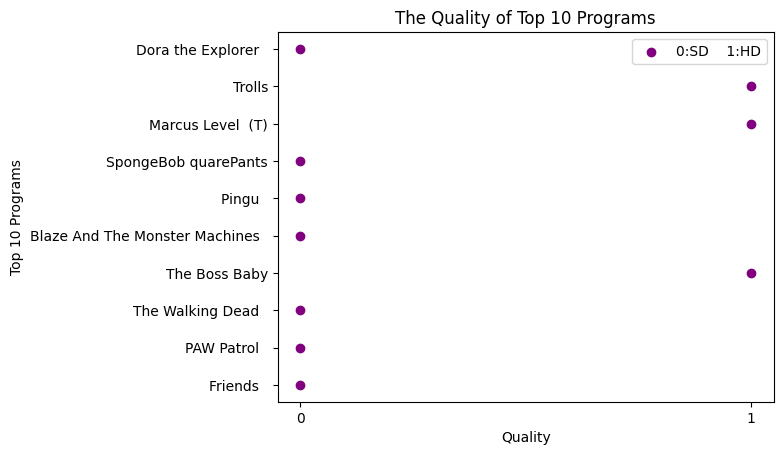

In [109]:
top_10 = programs.nlargest(10, 'number_of_watches')[['name', 'hd', 'number_of_watches']]

plt.scatter(top_10['hd'], top_10['name'], color="purple")
plt.xticks([0, 1])
plt.xlabel('Quality')
plt.ylabel('Top 10 Programs')
plt.title('The Quality of Top 10 Programs')
plt.savefig('Qulity_top_10.png')
plt.legend(['0:SD    1:HD'])

plt.show()

# Last Version of Data

In [98]:
programs[['name', 'type', 'genre', 'hd', 'number_of_watches']].sort_values(by='number_of_watches', ascending=False).head(10)

,name,type,genre,hd,number_of_watches
254972,Friends,series,Comedy,0,32892
842970,PAW Patrol,series,Animation,0,26806
120501,The Walking Dead,series,Horror,0,25100
250198,The Boss Baby,movie,Animation,1,24047
431427,Blaze And The Monster Machines,series,Animation,0,19019
392290,Pingu,series,Animation,0,17063
37309,SpongeBob quarePants,series,Animation,0,14051
522889,Marcus Level (T),series,Animation,1,13804
136123,Trolls,movie,Animation,1,13793
128211,Dora the Explorer,series,Animation,0,12813


# Recomenditaion System

In [30]:
# label_encoder = LabelEncoder()
# programs['e_type'] = label_encoder.fit_transform(programs['type'])
# programs['e_genre'] = label_encoder.fit_transform(programs['genre'])
# programs['e_cleaned_name'] = label_encoder.fit_transform(programs['cleaned_name'])

In [ ]:

quality = input("أدخل جودة الفيلم (SD أو HD): ").upper()
genre = input("أدخل التصنيف المطلوب: ")
film_or_series = input("هل تبحث عن فيلم (F) أم مسلسل (S): ").upper()
num = int(input("ادخل عدد التوصيات التي تريدها: "))

quality_value = 1 if quality == "HD" else 0

film_or_series = "movie" if film_or_series == "F" else "series"

filtered_data = programs[
    (programs["genre"] == genre) &
    (programs["type"] == film_or_series) &
    (programs["hd"] == quality_value)
]

filtered_data = filtered_data.sort_values(by='number_of_watches', ascending=False)

filtered_data = filtered_data[["type", "genre", "name", "number_of_watches"]]

filtered_data.head(num)

In [ ]:
# # Assuming 'program' is the DataFrame containing the TV show/movie data
# programs.to_pickle("program.pkl")